# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Boston Housing Dataset

Begin to use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Finding variables with high correlation (use the np.corrcoeff method in combination with iteration)
* Commenting on the distribution of at least 3 variables
* Creating a box plot
* Investigate other potential relations

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Data

In [2]:
df = pd.read_csv('train.csv')
print(len(df))
df.head()

333


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


# Investigating Distributions

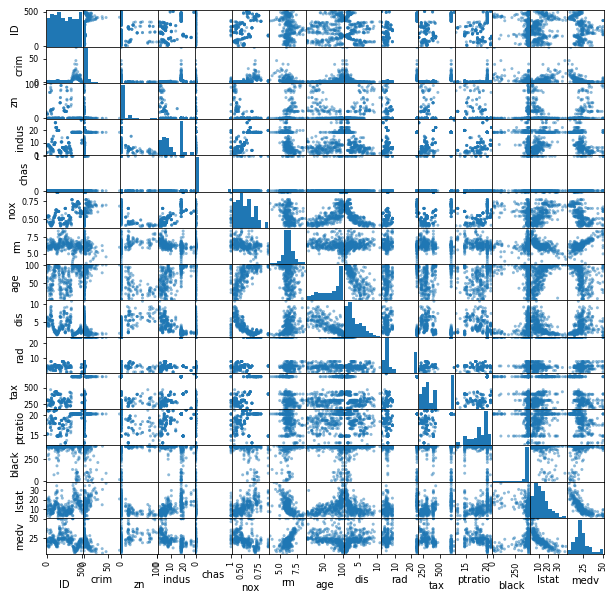

In [4]:
pd.plotting.scatter_matrix(df, figsize=(10,10));

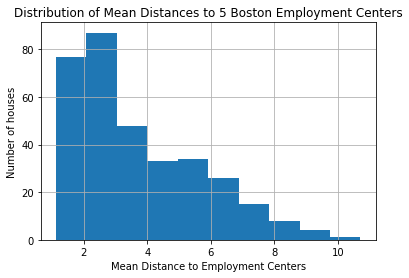

In [5]:
df.dis.hist()
plt.title('Distribution of Mean Distances to 5 Boston Employment Centers')
plt.xlabel('Mean Distance to Employment Centers')
plt.ylabel('Number of houses')

# Comment:

Skewed distribution; most houses in this sample are quiet close to the employment centers, few far

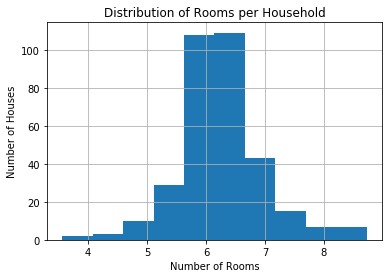

In [13]:
df.rm.hist()
plt.title('Distribution of Rooms per Household')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Houses')

# Comment:
The number of rooms in houses is approximately normally distributed, with a mean around 6 rooms.

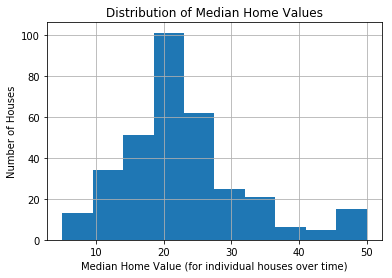

In [7]:
df.medv.hist()
plt.title('Distribution of Median Home Values')
plt.xlabel('Median Home Value (for individual houses over time)')
plt.ylabel('Number of Houses')

# Comment:
Most homes are valued around 200K.

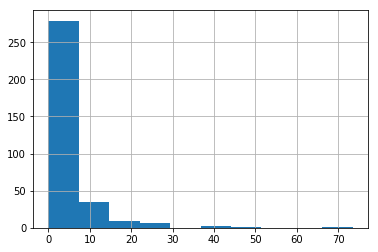

In [13]:
#Most crime rates are well below 10.
df.crim.hist()

In [14]:
df.crim.quantile(.5)

0.26169000000000003

In [15]:
df.crim.max()

73.534099999999995

In [16]:
df.crim.quantile(.9)

9.958202

# Box Plots

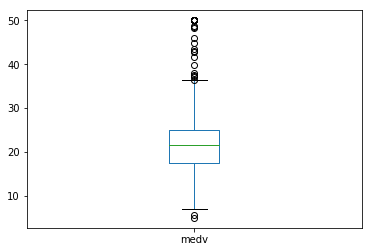

In [10]:
df.medv.plot(kind='box')

# Investigating Correlation

In [2]:
import numpy as np

In [8]:
### Investigation Correlations
for n, feat1 in enumerate(df.columns):
    for feat2 in df.columns[n+1:]:
        r2 = np.corrcoef(df[feat1], df[feat2])[0][1]
        if r2 > .7:
            print('{} and {} have a correlation coefficient of {}!'.format(feat1, feat2, r2))

ID and rad have a correlation coefficient of 0.7075262711727569!
indus and nox have a correlation coefficient of 0.7500874390908753!
indus and tax have a correlation coefficient of 0.7083132697607595!
nox and age have a correlation coefficient of 0.7359995828422862!
rad and tax have a correlation coefficient of 0.9035618963206141!


# Other Investigations Will Vary

One exploration of home values by age:

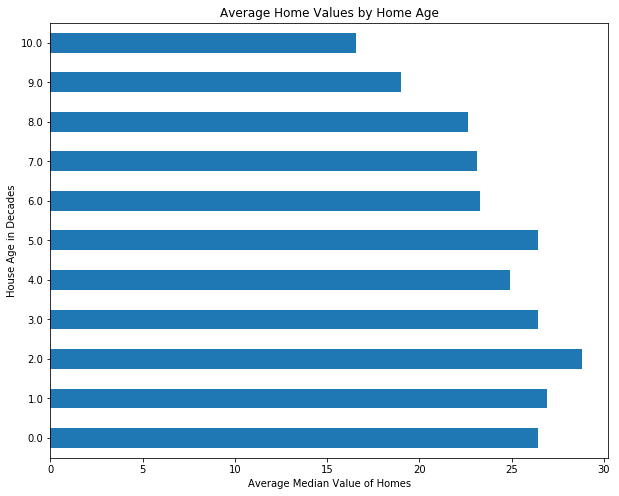

In [19]:
df['decades'] = df.age // 10
to_plot = df.groupby('decades').medv.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Median Value of Homes')
plt.title('Average Home Values by Home Age')

# Comment

The approximate age of the house appears most significant for homes over 50 years of age. Before this, there appears to be little impact.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!
